**TUGAS 5**

Nama: RAHMA NURHALIZA

NIM  : 210411100176

Kelas : PPW A

#Ringkas Berita

Mengambil 1 dokumen berita ektrak kalimat jadi objek, hitung tfidf,Cosine similarity, buat grafnya, mencari centrality dan ringkas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/PPW/tugas/2_Kategoriberita-CNN.csv")
df.head(1)

,judul,isi,tanggal,kategori
0,Jokowi Groundbreaking 2 Investasi Asing di IKN...,Presiden Joko Widodo (Jokowi) dijadwalkan mela...,"Selasa, 10 Sep 2024 20:02 WIB",Ekonomi


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Menghitung TF-IDF untuk setiap Kalimat

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenisasi kalimat dari teks berita
kalimat = nltk.sent_tokenize(df['isi'][0])

# Menghitung TF-IDF untuk setiap kalimat
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(kalimat)

#DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=kalimat)

# Menampilkan hasil TF-IDF dalam bentuk DataFrame
print("TF-IDF per Kalimat:")
tfidf_df.head()
#print(tfidf_df)

# Menampilkan hasil TF-IDF
#print("TF-IDF Matrix per Kalimat:")
#print(tfidf_matrix.toarray())
#tfidf_matrix()


TF-IDF per Kalimat:


,10,19,20,2024,ada,akan,asing,atau,australia,bahwa,...,timur,ujarnya,understanding,untuk,use,video,widodo,ya,yakni,yang
"Presiden Joko Widodo (Jokowi) dijadwalkan melakukan peletakan batu pertama atau groundbreaking proyek ke-8 di IKN Nusantara, Kalimantan Timur, pada 19-20 September 2024.",0.000000,0.194573,0.194573,0.224806,0.000000,0.000000,0.000000,0.194573,0.000000,0.0,...,0.224806,0.0,0.0,0.000000,0.0,0.0,0.224806,0.0,0.000000,0.0
"Kepala Presidential Communication Officer (PCO) Hasan Nasbi mengatakan groundbreaking kali ini dilakukan pertama kali untuk investasi asing, yakni dari China dan Australia.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.196937,0.000000,0.175225,0.0,...,0.000000,0.0,0.0,0.175225,0.0,0.0,0.000000,0.0,0.227538,0.0
"""Nanti tanggal 19 atau tanggal 20 (September) itu akan ada rencana groundbreaking di IKN,"" kata Hasan dalam konferensi pers di Kantor PCO, Jakarta Pusat, Selasa (10/9).",0.208181,0.180183,0.180183,0.000000,0.160319,0.160319,0.000000,0.180183,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Hasan menjelaskan investasi dari China akan bergerak di campuran jasa.,0.000000,0.000000,0.000000,0.000000,0.000000,0.302649,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Sementara investasi dari Australia dalam sektor pendidikan.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350155,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


## Cosinus Similiarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(tfidf_matrix)
similarity = pd.DataFrame(cosine, columns=range(
        len(kalimat)), index=range(len(kalimat)))

similarity.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.058984,0.219632,0.035693,0.000000,0.000000,0.000000,0.000000,0.111270,0.054437,0.000000,0.024278,0.000000,0.0
1,0.058984,1.000000,0.077573,0.176991,0.138496,0.020182,0.000000,0.061421,0.205503,0.021184,0.097080,0.070139,0.000000,0.0
2,0.219632,0.077573,1.000000,0.154269,0.070910,0.018465,0.147317,0.000000,0.130466,0.073332,0.026007,0.055487,0.040077,0.0
3,0.035693,0.176991,0.154269,1.000000,0.133237,0.034858,0.150086,0.000000,0.155695,0.079859,0.105659,0.000000,0.000000,0.0
4,0.000000,0.138496,0.070910,0.133237,1.000000,0.040330,0.000000,0.277777,0.082190,0.042332,0.065441,0.000000,0.000000,0.0


Jumlah Node: 14
Jumlah Edge: 67


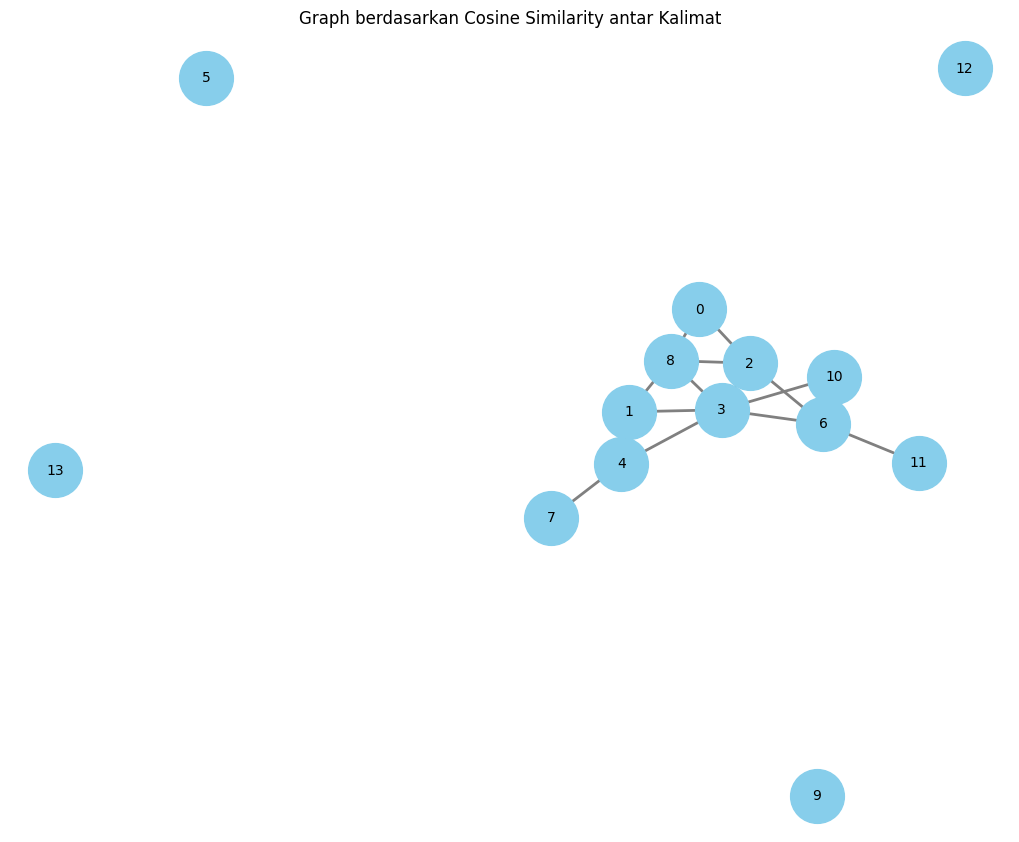

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for i in range(len(cosine)):
        G.add_node(i)

for i in range(len(cosine)):
  for j in range(len(cosine)):
    similarity = cosine[i][j]
    if similarity > 0.1 and i != j:
      G.add_edge(i, j)

nx_graph = nx.from_numpy_array(cosine)

# Menampilkan graf
plt.figure(figsize=(10, 8))

# Menggambar graf
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_color='black', edge_color='gray', width=2, arrows=True)

print("Jumlah Node:", nx.number_of_nodes(nx_graph))
print("Jumlah Edge:", nx.number_of_edges(nx_graph))

# Menampilkan plot
plt.title("Graph berdasarkan Cosine Similarity antar Kalimat")
plt.show()


In [ ]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(nx_graph)

# Menampilkan betweenness centrality tertinggi
print("\nBetweenness centrality tertinggi:")
ranked_by_betweenness = sorted(((betweenness_centrality[i], s) for i, s in enumerate(kalimat)), reverse=True)
for i, (score, sentence) in enumerate(ranked_by_betweenness[:5]):
    print(f"{i+1}. (betweenness centrality: {score:.4f} {sentence} )")


Betweenness centrality tertinggi:
1. (betweenness centrality: 0.0645 Daftar 7 Jenis Kendaraan yang Masih Diizinkan Beli Pertalite Cs "Ya kalau tidak salah yang dari Cina itu mixed use ya. )
2. (betweenness centrality: 0.0589 Hasan mengklaim groundbreaking proyek dari investasi asing itu menunjukkan kepercayaan swasta, termasuk juga pemodal asing untuk berinvestasi di IKN sudah terlihat. )
3. (betweenness centrality: 0.0589 "Nanti tanggal 19 atau tanggal 20 (September) itu akan ada rencana groundbreaking di IKN," kata Hasan dalam konferensi pers di Kantor PCO, Jakarta Pusat, Selasa (10/9). )
4. (betweenness centrality: 0.0322 Namun, ia meminta publik memahami bahwa proses investasi di IKN bukan proses yang cepat. )
5. (betweenness centrality: 0.0322 Kepala Presidential Communication Officer (PCO) Hasan Nasbi mengatakan groundbreaking kali ini dilakukan pertama kali untuk investasi asing, yakni dari China dan Australia. )


In [ ]:
# Urutkan kalimat berdasarkan nilai centrality tertinggi
ranked_sentences = sorted(((betweenness_centrality[i], s) for i, s in enumerate(kalimat)), reverse=True)

#Ringkas
summary_sentences = [sentence for _, sentence in ranked_sentences[:4]]
summary = ' '.join(summary_sentences)

# Menampilkan ringkasan
print("Ringkasan Berita:")
summary

Ringkasan Berita:


'Daftar 7 Jenis Kendaraan yang Masih Diizinkan Beli Pertalite Cs "Ya kalau tidak salah yang dari Cina itu mixed use ya. Hasan mengklaim groundbreaking proyek dari investasi asing itu menunjukkan kepercayaan swasta, termasuk juga pemodal asing untuk berinvestasi di IKN sudah terlihat. "Nanti tanggal 19 atau tanggal 20 (September) itu akan ada rencana groundbreaking di IKN," kata Hasan dalam konferensi pers di Kantor PCO, Jakarta Pusat, Selasa (10/9). Namun, ia meminta publik memahami bahwa proses investasi di IKN bukan proses yang cepat.'